# Mini projet : Atelier en python

 


Dans ce mini projet, nous examinons les problèmes suivants:

- La préparation et la visualisation des données avec Pandas et Matplotlib

- Fractionnement des données en deux sous-ensembles: entrainement et test

- Création d'un modèle de réseau de neurones

- Entraînement du modèle à l'aide du sous-ensemble de données d'entraînement

- Évaluation de la précision du modèle à l'aide du sous-ensemble de données de test

- Prédiction de la spécification de classe des espèces de fleurs d'iris à l'aide du modèle

- Affichage de la courbe de la fonction de coût
 



**Description de jeu de données**
 
L'ensemble de données Iris contient des échantillons de 3 types différents de plantes Iris .

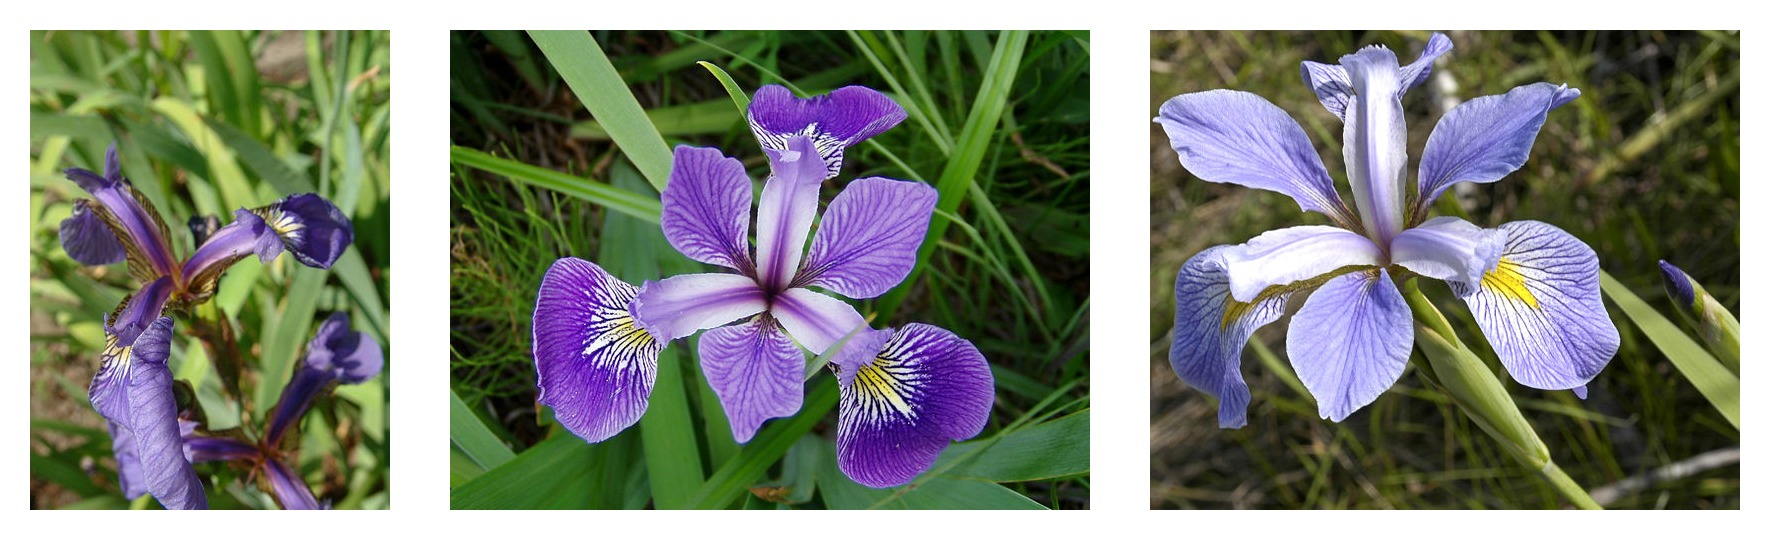
Setosa
Versicolor
Virginica

Les échantillons de données contiennent 50 échantillons pour chacun des différents types d'espèces. Chaque échantillon est composé de 4 caractéristiques distinctes des plantes, notamment:

Longueur sépale

Largeur sépale
Longueur des pétales
Largeur des pétales

# 1- Préparation des donnés

## Importer les libraries: Numpy, Pandas et Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl


## Lecture de ficher csv "irisDataset.csv"

In [2]:
df=pd.read_csv('irisDataset.csv',sep=',')

### Afficher le shape de Dataframe

In [3]:
df.shape

(150, 5)

## afficher les premières lignes du jeu de données

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Afficher l'histogramme de sepal_length avec légende: Histogramme de longueur du sépale

Text(0.5, 1.0, 'Histogramme de longueur du sépale')

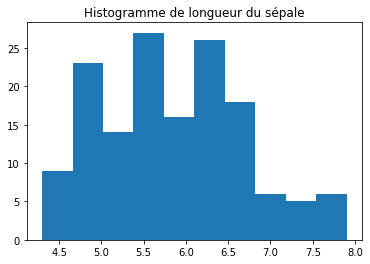

In [5]:
import matplotlib.pyplot as plt
plt.hist(df.sepal_length)
plt.title('Histogramme de longueur du sépale')

 ### Afin de mieux comprendre notre jeu de données, afficher le nuages de points de sepal_length et sepal_width de l'espèce  "setosa" en rouge, et de l'espèce "virginica" en bleu. 
 la légendre de la figure est "visualisation des données"

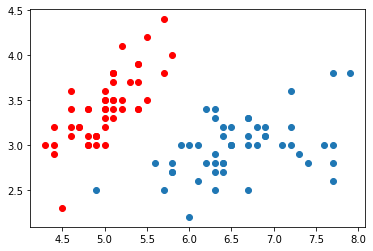

In [6]:
B=df.groupby("species")
x=B.get_group("setosa")
y=B.get_group("virginica")
plt.scatter(x.sepal_length,x.sepal_width, c = "red")
plt.scatter(y.sepal_length,y.sepal_width)

## changer toutes les occurences de "setosa" en 0 etle reste en 1 avec df.replace
Nb: On fait ce processus pour transformer le problème de classification multi-classe en un classification binaire (0 ou 1)

In [7]:
s=set()
for i in range(df.values.shape[0]):
    s.add(df.values[i][4])
d=dict()
#for i in s:
  #  df.replace(to_replace=str(i), value=1)
#df.replace(to_replace="setosa", value=0)  
     #n'a pas marché [seuls setosa sont changés en 0 ] (je me demande pourquoi pas les autres et si vous avez une idée) 
      #dans la documentation ils détaillent l'usage des dicts
for i in s:
    if i!="setosa" :
        d[i]=1
    else :
        d["setosa"]=0
df=df.replace(to_replace=d)

# Séléctionner deux variables x et y
Le réseau de neurone est fait partie de groupe d’apprentissage supervisé c’est-à-dire qu’à partir de la variable cible (x) ou de la variable à expliquer (y), le réseau a pour but de faire une prédiction grâce à des variables dites explicatives (x) ou prédictives.<br>
Les caractéristique des plantes représentent les entrées de réseau, x va prendre les 4 première colonne de 100 première lignes, quant à y (la classe de plante), elle inclut les valeurs les 100 premières lignes de la dernière colonne espèces (species).<br>
En d'autres termes, à partir des caractéristiques X (sepal_length	sepal_width,petal_length,petal_width), on essaie de prédire la classe de la plante
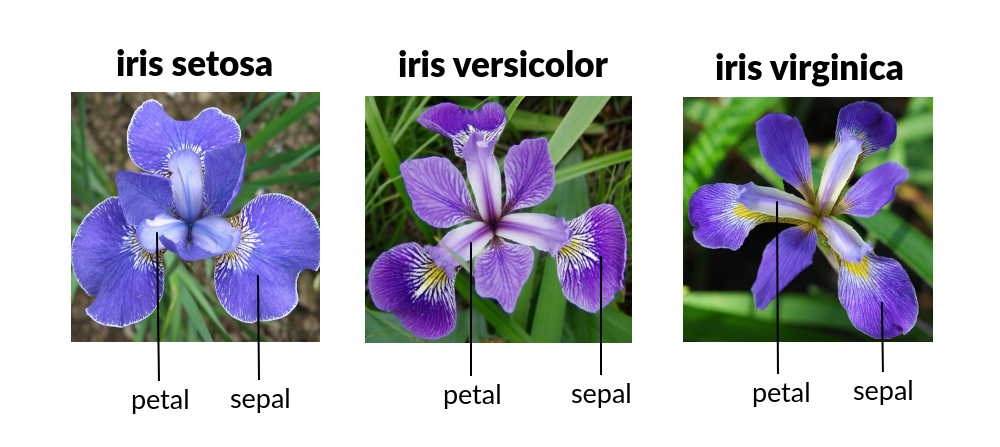

In [8]:
s=len(df.columns)
print(s)
x=df[df.columns[:s-1]].iloc[:100]
print(x)
y=df["species"].iloc[:100]
print(y)

5
    sepal_length  sepal_width  petal_length  petal_width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
..           ...          ...           ...          ...
95           5.7          3.0           4.2          1.2
96           5.7          2.9           4.2          1.3
97           6.2          2.9           4.3          1.3
98           5.1          2.5           3.0          1.1
99           5.7          2.8           4.1          1.3

[100 rows x 4 columns]
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: species, Length: 100, dtype: int64


## Transformer ces variables en Numpy array

In [9]:
x=np.array(x)
y=np.array(y)

In [10]:
x.shape,y.shape # cette instruction doit afficheer (100, 4), (100,)

((100, 4), (100,))

## changer l'ordre de x et y à un ordre aléatoire (np.random.shuffle)
Remarque:<br>
Faut appliquer le nouvel ordre sur x et y pour ne pas avoir de bruit d'étiquetage.

In [11]:
np.random.shuffle(x)
np.random.shuffle(y)

## Data Splitting:
Initilializer 80% de donnés de x et y dans la variable x_train et y_train, respectivement, et le reste dans x_test et y_test

In [12]:
x_test=x[int(x.shape[0]*0.8):]
y_test=y[int(y.shape[0]*0.8):]
x_train=x[:int(x.shape[0]*80/100)]
y_train=y[:int(y.shape[0]*80/100)]

In [13]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape # affiche ((80, 4), (80,), (20, 4), (20,))

((80, 4), (80,), (20, 4), (20,))

# 2- Conception d'un réseau de neurones
Un réseau de neurones artificiels ou Neural Network est un système informatique s’inspirant du fonctionnement du cerveau humain pour apprendre. 
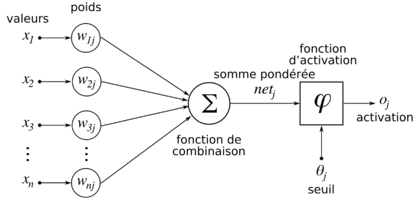

# 2.1. Initialisation des paramètres
La première étape consiste à  initialiser les paramètres 𝑤 (poids) et 𝑏 (biais). Dans l'exemple suivant, 𝑤 est initialisé comme un vecteur de nombres aléatoires en utilisant np.random.rand() avec un shape "dim" envoyé comme paramètre tandis que 𝑏 est initialisé à 0.1. <br>
Cette fonction retourne les valeurs suivantes pour dim=4
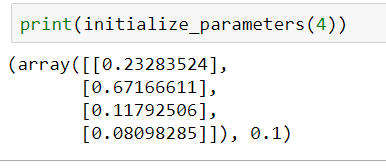

In [14]:
def initialize_parameters(dim):
    b=0.1
    w=np.random.rand(dim) 
    x=list()
    x.append(w)
    x.append(b)
    return tuple(x)

In [15]:
print(initialize_parameters(4))

(array([0.39540788, 0.36203962, 0.86538601, 0.63043125]), 0.1)


## 2.2. Définir la fonction d'activation Sigmoid
la fonction d'activation est une fonction mathématique appliquée à un signal en sortie d'un neurone artificiel.
Dans ce TP, on propose de travailler avec la fonction sigmoid, qui est définie comme suit:
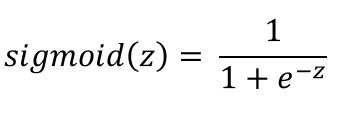

In [16]:
def sigmoid(z):
    return (1+np.exp(-z))**(-1)

In [17]:
sigmoid(20) #doit retourner 0.9999

0.9999999979388463

In [18]:
sigmoid(0) #doit retourner 0.5

0.5

## 2.2. Prédiction 

En utilisant les paramètres appris w et b, nous pouvons prédire les étiquettes (y_predà pour des entrées (x). La prédiction est donnée comme suit.
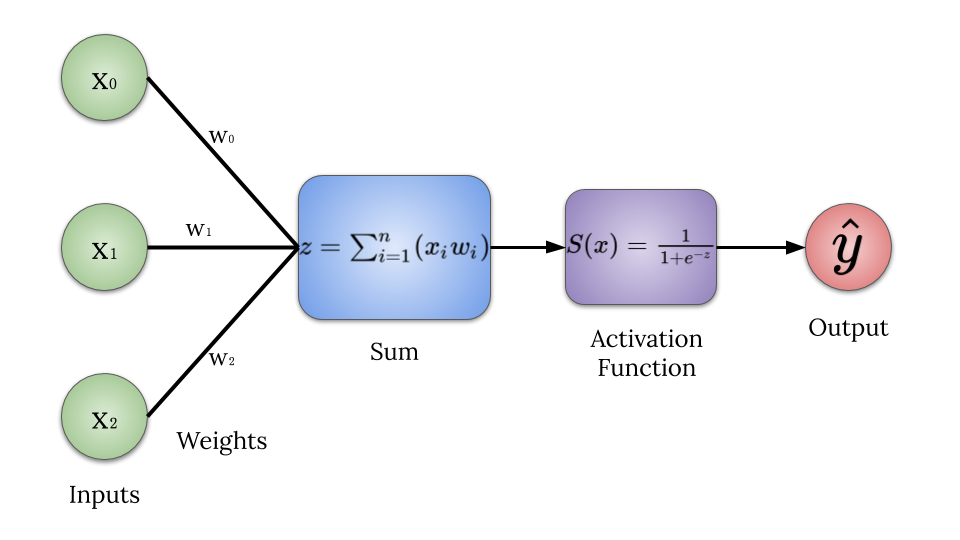

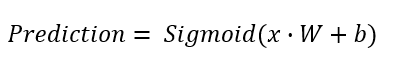

In [31]:
def prediction(x, w, b):
    a=b
    C=np.dot(x,w)
    if type(a)== float:
        C=C+a
    else:
        C=C+a.mean()
    for i in range(C.shape[0]):
            C[i]=sigmoid(C[i])
    return C

## 2.3. La fonction d'erreur:
Durant l'apprentissage avec un réseau de neurone, le but est d'optimizer une certaine fonction de coût, on suppose que cetet fonction est convexe, c’est-à-dire une fonction qui n’a qu’un seul minimum, et de chercher ce minimum avec un algorithme.
Cette fonction L(y,y_pred) est définie comme suit:
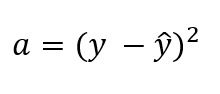

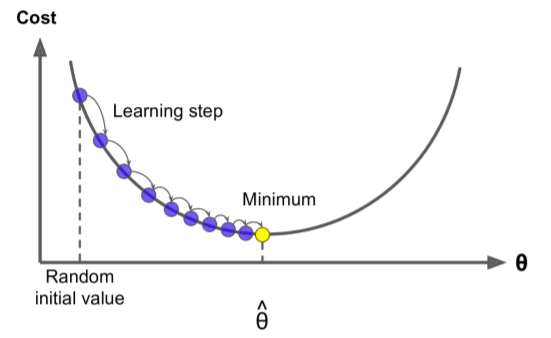

In [32]:
# y_pred désigne y chapeau 
def Loss(y,y_pred):
    t=y-y_pred
    a=t**2
    return a

In [33]:
Loss(0,1),Loss(1,0),Loss(0,5) #retourne (1,1,25)

(1, 1, 25)

## 2.4. Caclculer la valeur de gradient pour w et b
L’entraînement d’un réseau de neurone consiste à déterminer et à calculer empiriquement la valeur de chacun de ses poids (w et b). <br>
la rétropropagation du gradient est une méthode pour calculer le gradient de l'erreur pour chaque neurone d'un réseau de neurones. <br>
Les gradients pour w et b sont calculés avec les formules suivantes: 
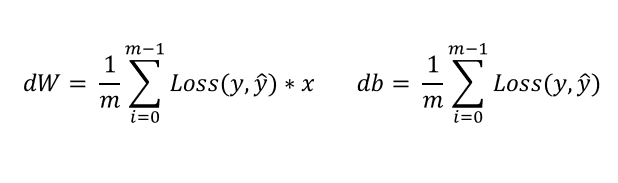
m indique le nombre de ligne de y

In [34]:
def gradient(a, x, y):
    m=y.shape[0]
    dW=((a.T).dot(x))/m
    db =a/m
    return dW,db

### 2.5. Mettre à jour les poids W et b
les paramètres d’un réseau de neurones (w,b) vont être estimés d'une façon progressive par descente de gradient en utilisant les équations suivantes
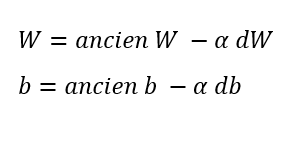

In [35]:
def mettreAjour(w,b,dW,db,alpha):
    w=w-alpha*dW
    b = b-alpha*db
    return w,b

## 2.6. Rétropropagation du gradient

la mise à jour des paramètres (w et b)  doit être effectuée pour de nombreuses itérations.

Définissons une fonction desc_grad, qui fait l'appelle par cet ordre à : 
<ol>
  <li>prediction</li>
  <li>Loss</li>
  <li>gradient</li>
  <li>mettreAjour</li>
</ol>

In [36]:
def retro_grad(x, y, w, b, alpha): 
    #remplisser le code avec les fonctions adéquates
    y_pred =prediction(x, w, b)
    a= Loss(y,y_pred)
    dW,db = gradient(a, x, y)
    w,b = mettreAjour(w,b,dW,db,alpha)
    return w, b,a.mean()

## Une fois tous les fonctions sont bien implimenté, on peut lancer l'apprentissage en utilisant la fonction "apprentissage"

In [37]:
def apprentissage(iteration): 
    weights,bias = initialize_parameters(4)
    costs=[]
    for T in range(iteration): # 
        weights, bias, a = retro_grad(x_train, y_train, weights, bias, alpha=0.0001)
        costs.append(a.mean())
    return weights,bias,costs

### Faites l'apprentissage avec un nombre d'itération = 5 et 40. Avec quelle nombre vous avez obtenu les meilleurs performances ?

In [38]:
w=initialize_parameters(4)[0]

In [39]:
np.random.seed(40)
iteration= 4
w,b,costs = apprentissage(iteration)
print("Iterations =",iteration) 
print('w = ', w, 'b = ', b.mean())
print("y_test = {}".format(y_test))

Iterations = 4
w =  [0.40655513 0.05474469 0.78792126 0.2871345 ] b =  0.09999744450622064
y_test = [1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1]


In [40]:
prediction(x_train,w,b)

array([0.99775899, 0.96989281, 0.9482329 , 0.9984831 , 0.976489  ,
       0.99839972, 0.97236727, 0.99867807, 0.99890547, 0.99894534,
       0.96704711, 0.99904327, 0.99709026, 0.96877513, 0.97454353,
       0.99880751, 0.97379136, 0.9813525 , 0.99893526, 0.97364482,
       0.97223159, 0.99867106, 0.97464587, 0.98120101, 0.99906378,
       0.99922738, 0.99792227, 0.97574155, 0.97764863, 0.96989281,
       0.99400478, 0.99919797, 0.99886622, 0.99834596, 0.97673486,
       0.97579289, 0.99855865, 0.99885436, 0.95830555, 0.99681228,
       0.9758626 , 0.97337372, 0.99323968, 0.99785975, 0.96480047,
       0.99752212, 0.99421083, 0.99758414, 0.97973566, 0.96785814,
       0.99879181, 0.99808902, 0.99903241, 0.99691276, 0.99916702,
       0.99775455, 0.98289276, 0.9659576 , 0.99925536, 0.99895476,
       0.97889924, 0.99852451, 0.97539585, 0.96993733, 0.99727432,
       0.96113857, 0.99749491, 0.97465447, 0.99633245, 0.99814831,
       0.97178474, 0.99656357, 0.97080393, 0.98189618, 0.96462

### Evaluer la prédiction de votre modèle en appliquant les poids w et b sur les donnés de test (x_test ) et afficher la précision de votre réseau de neurone.
Remarque: la précision représente le taux de  prédiction correcte de votre modèle comme étant une probabilité, pour cela il est nécessaire de comparer les valeurs prédites (y_pred) retourner par la fonction "prediction" avec "y_test".

In [41]:
print(x_test.shape)

(20, 4)


In [42]:
y_pred=prediction(x_test,w,b)
y_pred=np.array([int(i) for i in np.round_(y_pred)])
print(y_pred)
print(y_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1]


In [43]:
False_counter=0
y_pred=prediction(x_test,w,b)
y_pred=np.array([int(i) for i in np.round_(y_pred)])
#y_pred=prediction(x_train,y,b)
for i in range(len(y_pred)):
    if y_pred[i]!=y_test[i] :
        False_counter=False_counter+1
y_p = 100-((False_counter/len(y_test))*100)
print(y_p)

60.0


In [44]:
def precision(y_pred,y_test):
    False_counter=0
    print(y_pred,y_test)
    for i in range(len(y_pred)):
        if y_pred[i]!=y_test[i] :
            False_counter=False_counter+1
        y_p = 1-(False_counter/len(y_test))
    return y_p

In [45]:
print(precision(y_pred,y_test)) # la précision de modèle sur le jeu de données de test (y_test)
# elle doit retourner une valeur entre 0 et 1. 1 indique une précision de 100%. 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] [1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1]
0.6


### Affichage la courbe de la fonction coût (variable "costs") en utilisant Matplotlib.
Vous devriez avoir un courbe décroissante si votre code est correcte. 

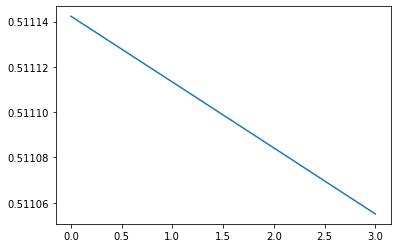

In [46]:
x=costs
plt.plot(x)